<a href="https://colab.research.google.com/github/Seeethy/Markowitz-portfolio-model-/blob/main/Markowitz_model_newest_version.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [175]:
import pandas_datareader.data as web
from datetime import date
import datetime
from dateutil.relativedelta import relativedelta
import itertools
import matplotlib.pyplot as plt
import pylab as plot
import numpy as np
import pandas as pd
import plotly.express as px 

In [176]:
companies = []
how_many = int(input("How many companies would you like to have in your portfolio?: "))
for c in range(how_many):
  company = input("Type the shortname of the company (it must be searchable in yahoo finance):  ")
  companies.append(company)

How many companies would you like to have in your portfolio?: 2
Type the shortname of the company (it must be searchable in yahoo finance):  FB
Type the shortname of the company (it must be searchable in yahoo finance):  BABA


In [177]:

#today = date.today()
#end_date = today.strftime("%Y-%m-%d")
#two_years_from_today = date.today() - relativedelta(years=5)
#start_date = two_years_from_today.strftime("%Y-%m-%d")
data_source= 'yahoo'

start_date = "2016-11-01"
end_date = "2020-09-01"

data_list = []
for i in range(len(companies)):
  data = web.DataReader(companies[i], data_source, start_date, end_date)
  data_list.append(data)

data = web.DataReader(companies, data_source, start_date, end_date)
adj_close = data["Adj Close"]
index = adj_close.index

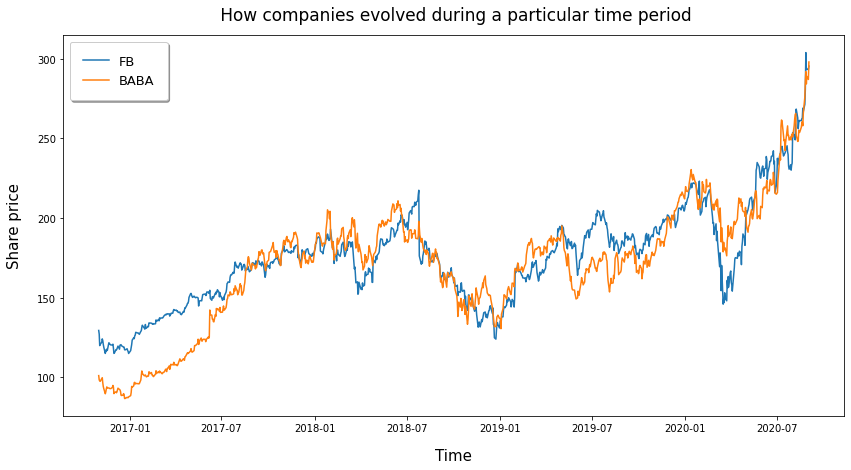

In [178]:

params = {'legend.fontsize': 13, 'legend.handlelength': 2}
plot.rcParams.update(params)

plt.figure(figsize=(14, 7))
plt.plot(index, adj_close)
plt.title(" How companies evolved during a particular time period",fontsize=17, pad = 15)
plt.xlabel("Time",fontsize=15,labelpad=15)
plt.ylabel("Share price",fontsize=15,labelpad=15)
plt.legend(companies, loc='upper left', fancybox=True, framealpha=1, shadow=True, borderpad=1) 
plt.show()

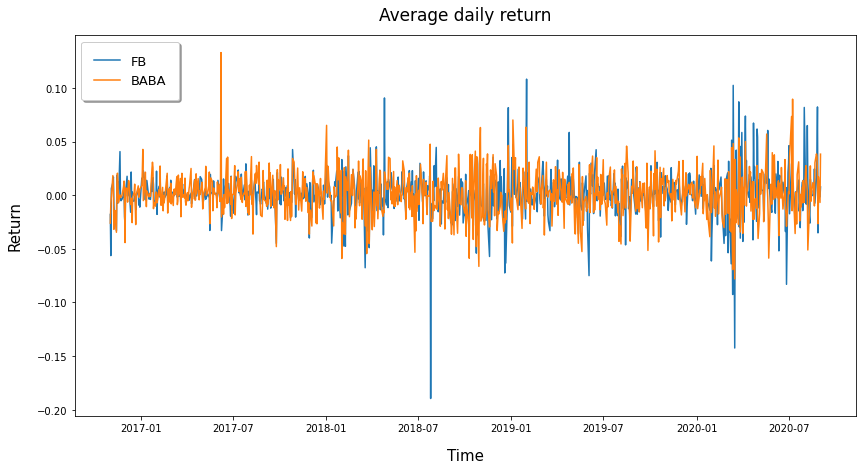

In [179]:
params = {'legend.fontsize': 13, 'legend.handlelength': 2}
plot.rcParams.update(params)

plt.figure(figsize=(14, 7))
plt.plot(index, adj_close.pct_change())
plt.title("Average daily return",fontsize=17, pad = 15)
plt.xlabel("Time",fontsize=15,labelpad=15)
plt.ylabel("Return",fontsize=15,labelpad=15)
plt.legend(companies, loc='upper left', fancybox=True, framealpha=1, shadow=True, borderpad=1) 
plt.show()


In [180]:
#np.log(average daily return)
log_returns = np.log(adj_close/adj_close.shift(1))
log_returns

Symbols,FB,BABA
Date,,
2016-11-01,NaN,NaN
2016-11-02,-0.018156,-0.026446
2016-11-03,-0.058033,-0.007745
2016-11-04,0.006231,-0.001843
2016-11-07,0.011528,0.018079
...,...,...
2020-08-26,0.079018,0.020625
2020-08-27,-0.035808,-0.027044
2020-08-28,0.001499,0.016854


In [181]:
# mean from average daily returns * trading days per year
log_returns.mean() * 252 

Symbols
FB      0.215608
BABA    0.282451
dtype: float64

In [182]:
# covariance from average daily returns * trading days per year
log_returns.cov() * 252

Symbols,FB,BABA
Symbols,,
FB,0.114013,0.056576
BABA,0.056576,0.105324


In [183]:
# correlation from average daily returns * trading days per year
log_returns.corr()

Symbols,FB,BABA
Symbols,,
FB,1.000000,0.516285
BABA,0.516285,1.000000


In [184]:
portfolio_returns = []
portfolio_volatilities = []
portfolio_weights = []

for x in range(10000):
    weights = np.random.random(len(companies))
    weights /= np.sum(weights)

    portfolio_weights.append(weights)
    portfolio_returns.append(np.sum(weights * log_returns.mean()) * 252)
    portfolio_volatilities.append(np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 252, weights))))
                    
portfolio_returns = np.array(portfolio_returns)
portfolio_volatilities = np.array(portfolio_volatilities)

data_transposed = zip(portfolio_weights)
weights_in_dataframe = pd.DataFrame(data_transposed,columns=["Weights"])

co = companies
if len(companies) == 2: 
  weights_in_dataframee = pd.DataFrame(portfolio_weights,columns=["Weight1: " + co[0], "Weight2: " + co[1]])
if len(companies) == 3: 
  weights_in_dataframee = pd.DataFrame(portfolio_weights,columns=["Weight1: " + co[0], "Weight2: " + co[1],"Weight3: " + co[2]])
if len(companies) == 4: 
  weights_in_dataframee = pd.DataFrame(portfolio_weights,columns=["Weight1: " + co[0], "Weight2: " + co[1],"Weight3: " + co[2], "Weight4: " + co[3]])
if len(companies) == 5: 
  weights_in_dataframee = pd.DataFrame(portfolio_weights,columns=["Weight1: " + co[0], "Weight2: " + co[1],"Weight3: " + co[2], "Weight4: " + co[3], "Weight5: " + co[4]])
if len(companies) == 6: 
  weights_in_dataframee = pd.DataFrame(portfolio_weights,columns=["Weight1: " + co[0], "Weight2: " + co[1],"Weight3: " + co[2], "Weight4: " + co[3], "Weight5: " + co[4] , "Weight6: " + co[5]])
if len(companies) == 7: 
  weights_in_dataframee = pd.DataFrame(portfolio_weights,columns=["Weight1: " + co[0], "Weight2: " + co[1],"Weight3: " + co[2], "Weight4: " + co[3], "Weight5: " + co[4] , "Weight6: " + co[5], "Weight7: " + co[6]])
if len(companies) == 8: 
  weights_in_dataframee = pd.DataFrame(portfolio_weights,columns=["Weight1: " + co[0], "Weight2: " + co[1],"Weight3: " + co[2], "Weight4: " + co[3], "Weight5: " + co[4] , "Weight6: " + co[5], "Weight7: " + co[6],  "Weight7: " + co[6]])


weights_in_dataframee

,Weight1: FB,Weight2BABA
0,0.467106,0.532894
1,0.606512,0.393488
2,0.432199,0.567801
3,0.868607,0.131393
4,0.379702,0.620298
...,...,...
9995,0.720526,0.279474
9996,0.575256,0.424744
9997,0.179683,0.820317
9998,0.369452,0.630548


In [185]:
fig = px.scatter(x = portfolio_volatilities, y = portfolio_returns, width=1200, height=750, hover_data=[weights_in_dataframe],
                 labels={'x': "Expected Volatility", 'y': "Expected Return",'hover_data_0': "Weights"})
fig.update_traces(marker=dict(size = 2))
fig.show()  

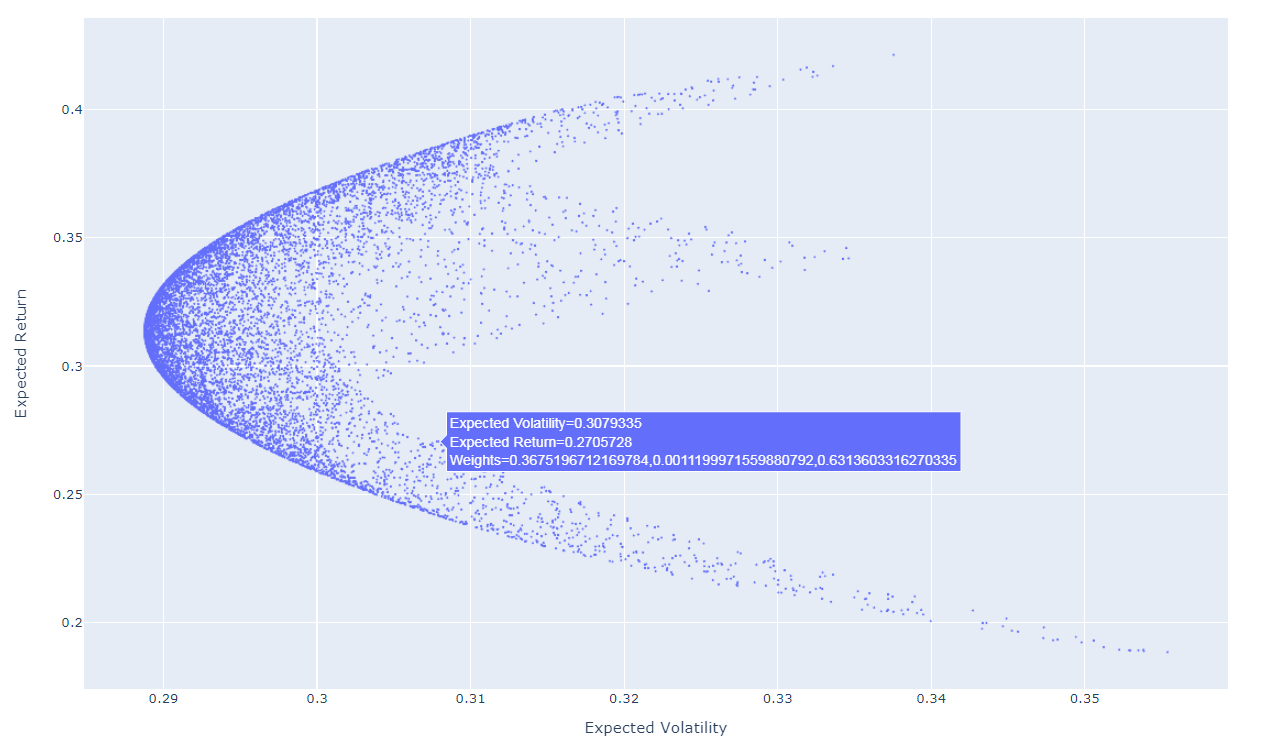

In [186]:
# minimum volatility portfolio

d = {'Volatility':portfolio_volatilities,'Returns':portfolio_returns}
m_v_p = pd.DataFrame(d)

m_v_p.reset_index(drop=True, inplace=True)
weights_in_dataframee.reset_index(drop=True, inplace=True)
 
portfolio = pd.concat([m_v_p,weights_in_dataframee],axis=1)

minimum = portfolio.loc[portfolio['Volatility'] == min(portfolio['Volatility'])]

mini = minimum[minimum.columns[0:2]]

print("The minimum volatility portfolio contains: \n")
minimum.iloc[0]

The minimum volatility portfolio contains: 



Volatility     0.288000
Returns        0.251763
Weight1: FB    0.459111
Weight2BABA    0.540889
Name: 3270, dtype: float64

In [187]:
# optimal risk portfolio

opt_risk = portfolio.iloc[((portfolio['Returns']) / portfolio['Volatility']).idxmax()]
print("The optimal risk portfolio contains: \n")
print(opt_risk)


The optimal risk portfolio contains: 

Volatility     0.295830
Returns        0.265633
Weight1: FB    0.251603
Weight2BABA    0.748397
Name: 4414, dtype: float64


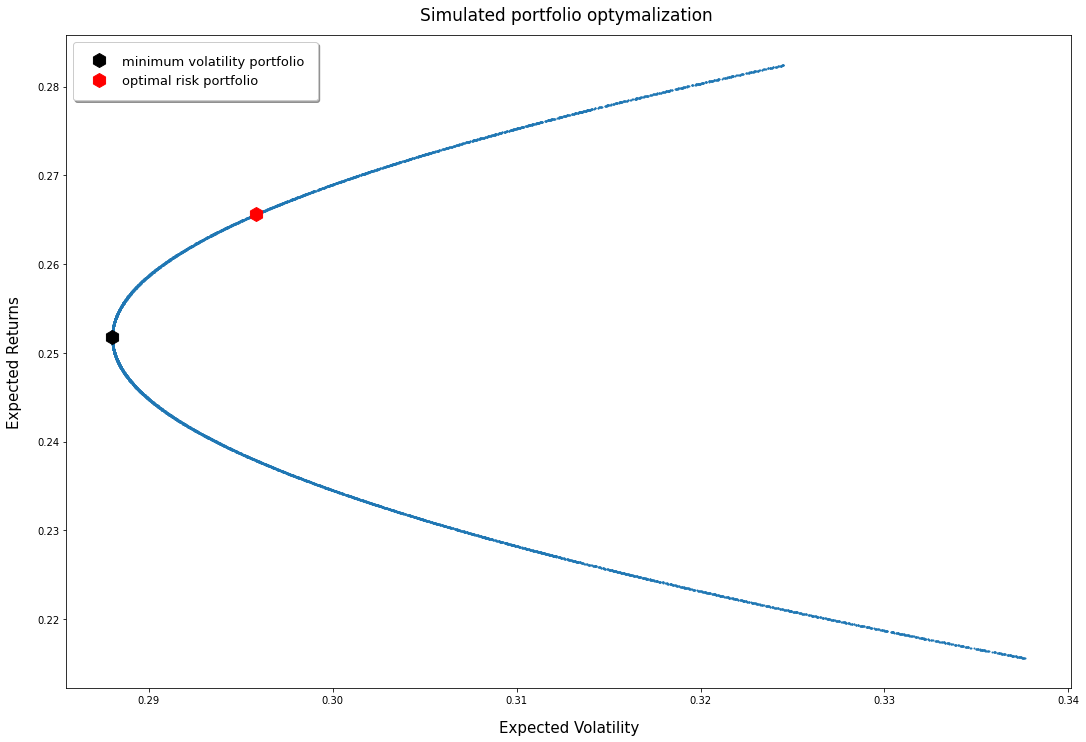

In [188]:
plt.scatter(portfolio_volatilities,portfolio_returns,s = 1)
plt.rcParams["figure.figsize"] = (18, 12)
plt.plot(mini['Volatility'],mini['Returns'],'h',color = 'black',markersize = 14)
plt.plot(opt_risk['Volatility'],opt_risk['Returns'],'h',color = 'red',markersize = 14)
legend_labels = ["minimum volatility portfolio", "optimal risk portfolio" ]
plt.title("Simulated portfolio optymalization ",fontsize=17, pad = 15)
plt.xlabel("Expected Volatility",fontsize=15,labelpad=15)
plt.ylabel("Expected Returns",fontsize=15,labelpad=15)
plt.legend(legend_labels, loc='upper left', fancybox=True, framealpha=1, shadow=True, borderpad=1) 

plt.show()

In [189]:
companies

['FB', 'BABA']